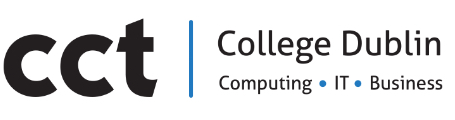

######

###### Programme Title: HDip in Science in Data Analytics for Business
###### Student Name: Catalina Gonzalez
###### Student number: 2024458
###### Module Title(s): Machine Learning for Business
###### Assignment Type: Individual       Weighting(s):50%
###### Assignment Title: CA2
###### Date: 18/04/2025

######

# Electric Vehicles
##### Tracking the Growth and Distribution of Electric Vehicles Across the US
#### About Dataset
 This dataset provides comprehensive information on the population of electric vehicles (EVs) registered across the United States. It captures key details such as vehicle make, model, model year, electric range, and type (Battery Electric Vehicles - BEVs, Plug-in Hybrid Electric Vehicles - PHEVs). The dataset also includes geographical insights, specifying registration counts at state and county levels.
The data is a crucial resource for understanding the adoption trends of electric mobility, supporting analyses on regional EV penetration, charging infrastructure needs, and environmental impact assessments related to EV growth. Researchers, policymakers, and industry stakeholders can leverage this dataset to explore market dynamics, forecast future growth, and plan for sustainable transportation infrastructure.

# https://www.kaggle.com/datasets/yashdogra/ev-bhebic-c?resource=download

##### 

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('Electric Vehicle.csv')

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


# Pandas = Manejo de datos.
# Matplotlib = Creación de gráficos básicos.
# Seaborn = Gráficos estadísticos más avanzados y fáciles de usar.
# NumPy = Manipulación eficiente de datos numéricos y operaciones matemáticas.

In [11]:
df.shape

(232230, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

In [13]:
print(df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [14]:
df = df.drop(['VIN (1-10)', 'State', 'Postal Code', 'Base MSRP','Legislative District', 'DOL Vehicle ID', 'Vehicle Location'], axis=1)

df.head()

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility,2020 Census Tract
0,King,Bellevue,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,King,Bothell,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,Thurston,Olympia,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,PUGET SOUND ENERGY INC,5.306701e+10
3,Thurston,Olympia,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,PUGET SOUND ENERGY INC,5.306701e+10
4,Yakima,Selah,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,PACIFICORP,5.307700e+10


In [15]:
duplicate_rows_df = df[df.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (106701, 10)


In [16]:
df.count()

County                                               232226
City                                                 232226
Model Year                                           232230
Make                                                 232230
Model                                                232230
Electric Vehicle Type                                232230
Clean Alternative Fuel Vehicle (CAFV) Eligibility    232230
Electric Range                                       232203
Electric Utility                                     232226
2020 Census Tract                                    232226
dtype: int64

In [17]:
df = df.drop_duplicates() 
df.head(5)

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility,2020 Census Tract
0,King,Bellevue,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,King,Bothell,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,Thurston,Olympia,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,PUGET SOUND ENERGY INC,5.306701e+10
3,Thurston,Olympia,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,PUGET SOUND ENERGY INC,5.306701e+10
4,Yakima,Selah,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,PACIFICORP,5.307700e+10


In [18]:
df.count()

County                                               125525
City                                                 125525
Model Year                                           125529
Make                                                 125529
Model                                                125529
Electric Vehicle Type                                125529
Clean Alternative Fuel Vehicle (CAFV) Eligibility    125529
Electric Range                                       125502
Electric Utility                                     125525
2020 Census Tract                                    125525
dtype: int64

In [19]:
print(df.isnull().sum())

County                                                4
City                                                  4
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                       27
Electric Utility                                      4
2020 Census Tract                                     4
dtype: int64


In [20]:
df = df.dropna()  
df.count()

County                                               125498
City                                                 125498
Model Year                                           125498
Make                                                 125498
Model                                                125498
Electric Vehicle Type                                125498
Clean Alternative Fuel Vehicle (CAFV) Eligibility    125498
Electric Range                                       125498
Electric Utility                                     125498
2020 Census Tract                                    125498
dtype: int64

In [21]:
print(df.isnull().sum())

County                                               0
City                                                 0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('Electric Vehicle.csv')

In [24]:
df = df.dropna(subset=['Electric Range'])

In [25]:
Q1 = df["Electric Range"].quantile(0.25)
Q3 = df["Electric Range"].quantile(0.75)
IQR = Q3 - Q1

In [26]:
Q1 = df['Electric Range'].quantile(0.25)
Q3 = df['Electric Range'].quantile(0.75)
IQR = Q3 - Q1

print(IQR)

38.0


## Histogram 

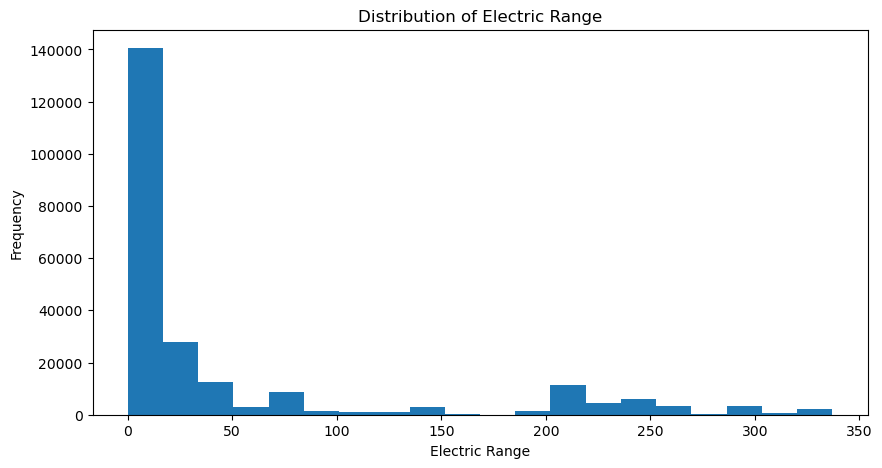

In [28]:
df["Electric Range"].plot(kind="hist", bins=20, figsize=(10, 5))
plt.title("Distribution of Electric Range")
plt.ylabel("Frequency")
plt.xlabel("Electric Range")

plt.show()

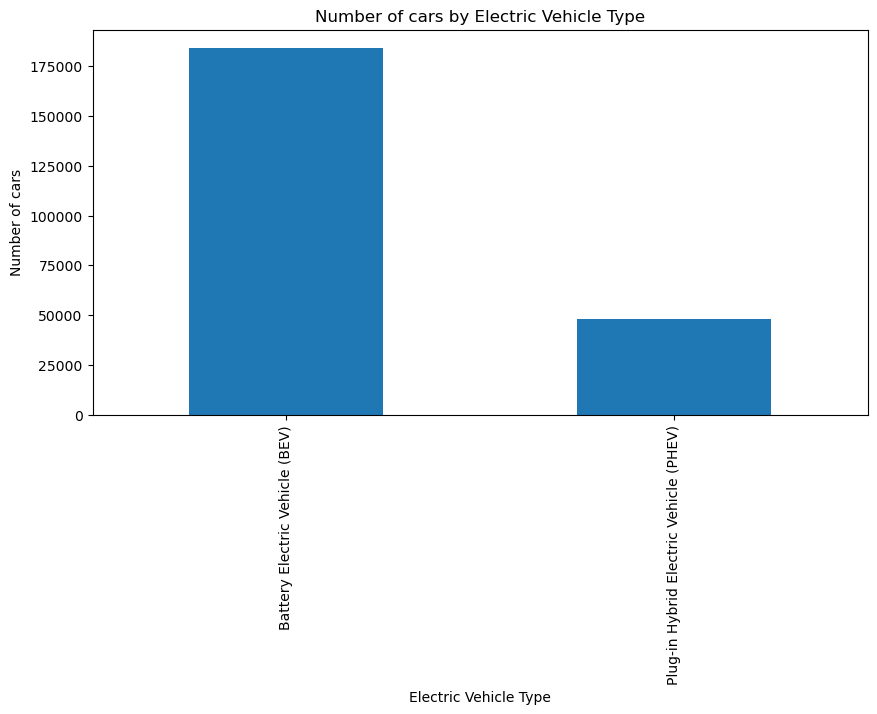

In [29]:
df = df.dropna(subset=["Electric Vehicle Type"])
df["Electric Vehicle Type"].value_counts().plot(kind="bar", figsize=(10, 5))
plt.title("Number of cars by Electric Vehicle Type")
plt.ylabel("Number of cars")
plt.xlabel("Electric Vehicle Type")

plt.show()

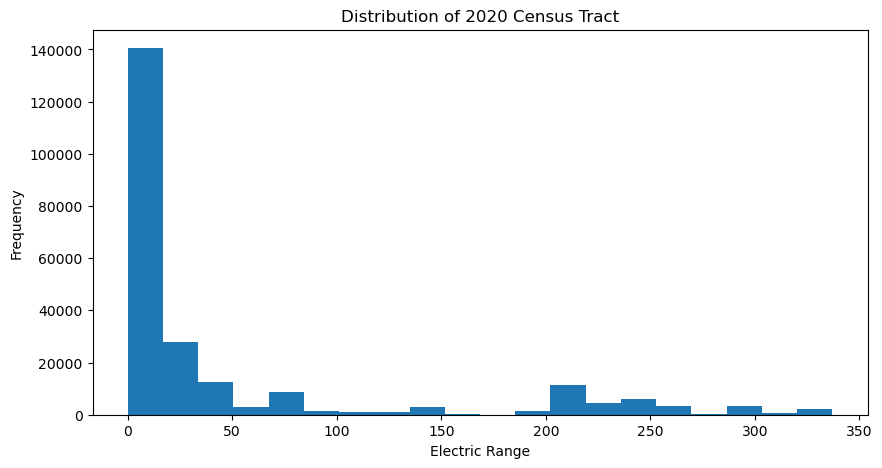

In [30]:
df["Electric Range"].plot(kind="hist", bins=20, figsize=(10, 5))
plt.title("Distribution of 2020 Census Tract")
plt.ylabel("Frequency")
plt.xlabel("Electric Range")

plt.show()

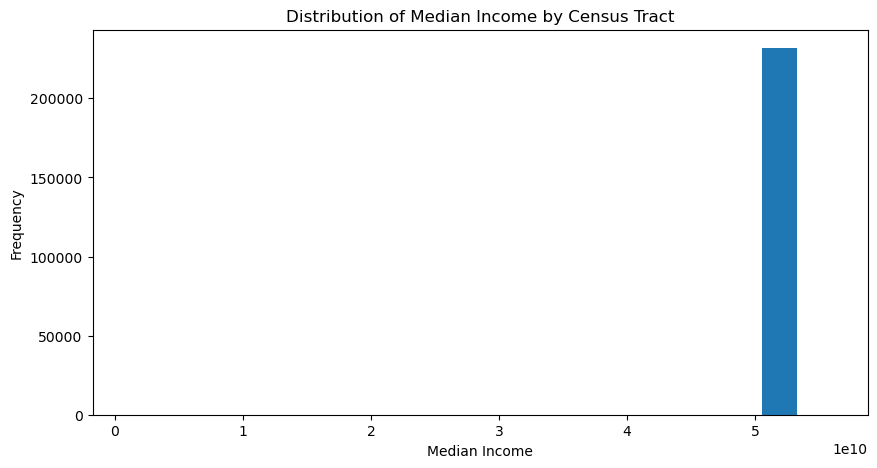

In [31]:
df["2020 Census Tract"].plot(kind="hist", bins=20, figsize=(10, 5))
plt.title("Distribution of Median Income by Census Tract")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()

## Scatterplot 

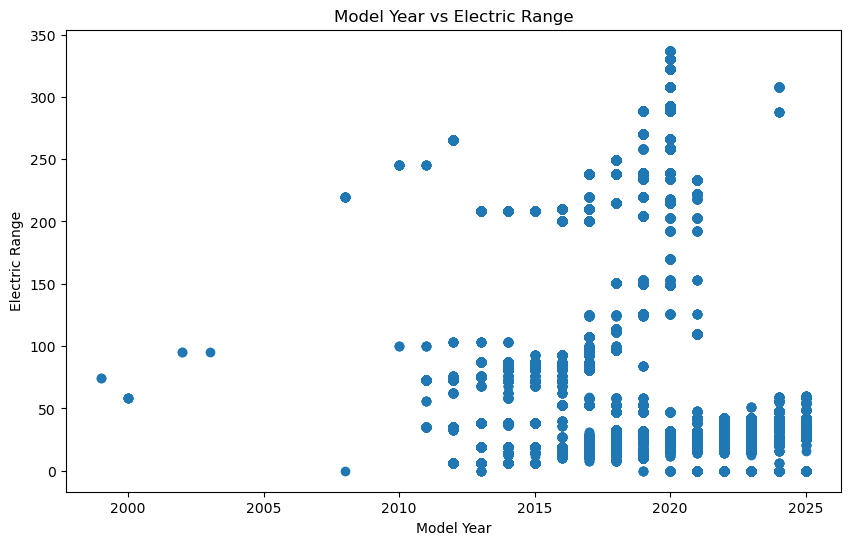

In [33]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(df["Model Year"], df["Electric Range"])
plt.title("Model Year vs Electric Range")
ax.set_xlabel("Model Year") 
ax.set_ylabel("Electric Range") 
plt.show()

#

## PCA

In [36]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [37]:
pca = PCA(n_components=1) 
X = np.random.rand(232203, 17)
pca.fit(X) 
X_pca = pca.transform(X)
print("original shape:   ", X.shape) 
print("transformed shape:", X_pca.shape) 

original shape:    (232203, 17)
transformed shape: (232203, 1)


#### original shape: (200, 2):

Tienes un conjunto de datos con 200 observaciones (filas) y 2 características (columnas). Cada observación tiene 2 características.

#### Después de aplicar PCA con 1 componente, cada observación ahora se representa en una sola dimensión. Es decir, aunque las observaciones originales tenían 2 características, la reducción de dimensionalidad ha transformado esos datos a 1 componente, manteniendo las 200 observaciones pero con 1 característica.

#####

## K-means clustering on the Electric Vehicles dataset

In [41]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('Electric Vehicle.csv')

In [44]:
df = df.dropna()

In [45]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)
x = df[['Model Year', 'Electric Range']].to_numpy()
y_kmeans = kmeans.fit_predict(x)

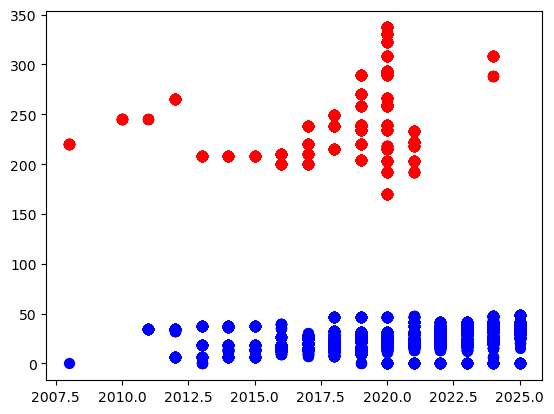

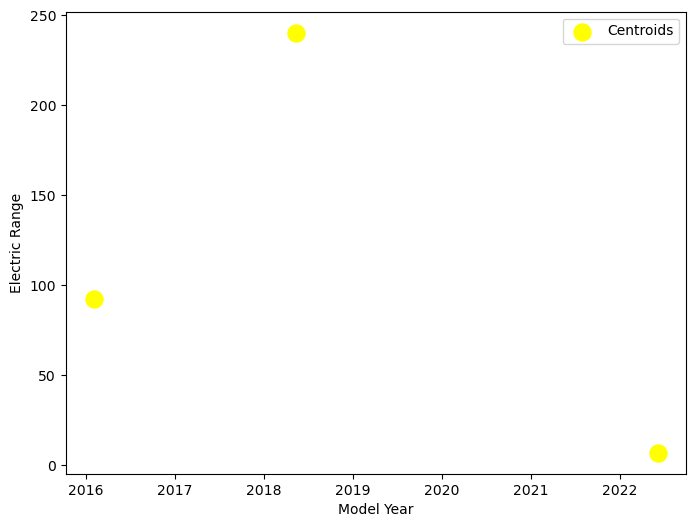

In [46]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')

plt.figure(figsize=(8,6))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')

plt.legend( loc ="best") 
plt.show()

###

## Elbow method

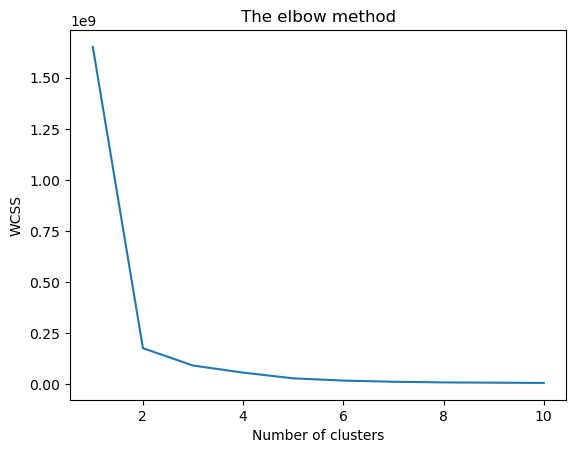

In [49]:
from sklearn.cluster import KMeans

x = df[['Model Year', 'Electric Range']].to_numpy()
wcss = []                  

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)   
                                                                            
    kmeans.fit(x)                                                                   
    wcss.append(kmeans.inertia_)                                                    


plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')   
plt.show()

## Silhouette Score

In [51]:
# from sklearn.metrics import silhouette_score

# print(f'Silhouette Score(n = 3): {silhouette_score(x, y_kmeans)}')

## DBSCAN Algorithm

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [55]:
np.random.seed(42)

def PointsInCircum(r, n = 100):
    return [(math.cos(2 * math.pi / n * x) * r + np.random.normal(-30, 30), 
             math.sin(2 * math.pi / n * x) * r + np.random.normal(-30, 30)) for x in range(1, n + 1)]

In [56]:
df1 = pd.DataFrame(PointsInCircum(500, 1000))
df2 = pd.DataFrame(PointsInCircum(300, 700))
df3 = pd.DataFrame(PointsInCircum(100, 300))

df4 = pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)])

df = pd.concat([df1, df2, df3, df4])

df.head()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


In [57]:
plt.figure(figsize = (10, 10))

plt.scatter(df["Model Year"], df["Electric Range"], s = 15, color = 'grey')
plt.title('Electric Range vs Model Year Scatter Plot',fontsize = 20)
plt.xlabel('Model Year',fontsize = 14)
plt.ylabel('Electric Range',fontsize = 14)
plt.show()

KeyError: 'Model Year'

<Figure size 1000x1000 with 0 Axes>

In [58]:
plt.figure(figsize=(10, 10))

plt.scatter(df["Model Year"], df["Electric Range"], s=15, color='grey')
plt.title('Electric Range vs Model Year Scatter Plot', fontsize=20)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Electric Range', fontsize=14)

# Mostrar el gráfico
plt.show()


KeyError: 'Model Year'

<Figure size 1000x1000 with 0 Axes>